In [ ]:
#====================================
# Deep Learning Dojo V1 - CNN
# Joshuah Touyz
#====================================

In [1]:
%pylab inline

import copy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.datasets import mnist, cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras.optimizers import SGD, RMSprop
from keras.utils import np_utils
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization

from PIL import Image

Populating the interactive namespace from numpy and matplotlib


/Users/brodyvogel/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# =============================
#  Reshaping data (faster)
# ============================
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28,1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28,1).astype('float32') / 255
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [3]:
# =============================
#  Setting up LeNet Architecture
# ============================
model = Sequential()

model.add(Conv2D(filters = 32,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters = 32,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 32,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid', input_shape=(28,28,1)))

model.add(Flatten())
model.add(Dense(84))
model.add(Dense(10))
model.add(Activation('softmax'))

In [4]:
# =============================
#  Training the model
# ============================
l_rate = 1
sgd = SGD(lr=l_rate, momentum=0.0, decay=0.0, nesterov=False)
# model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy']) -takes a long time to converge
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=4,
          verbose=2, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
 - 27s - loss: 0.2339 - acc: 0.9259 - val_loss: 0.0559 - val_acc: 0.9813
Epoch 2/4
 - 26s - loss: 0.0909 - acc: 0.9719 - val_loss: 0.0351 - val_acc: 0.9884
Epoch 3/4
 - 26s - loss: 0.0729 - acc: 0.9772 - val_loss: 0.0346 - val_acc: 0.9878
Epoch 4/4
 - 26s - loss: 0.0631 - acc: 0.9808 - val_loss: 0.0330 - val_acc: 0.9899


In [5]:
print("Test classification rate %0.05f" % model.evaluate(X_test, Y_test)[1])

10000/10000 [==============================] - 1s 145us/step
Test classification rate 0.98990


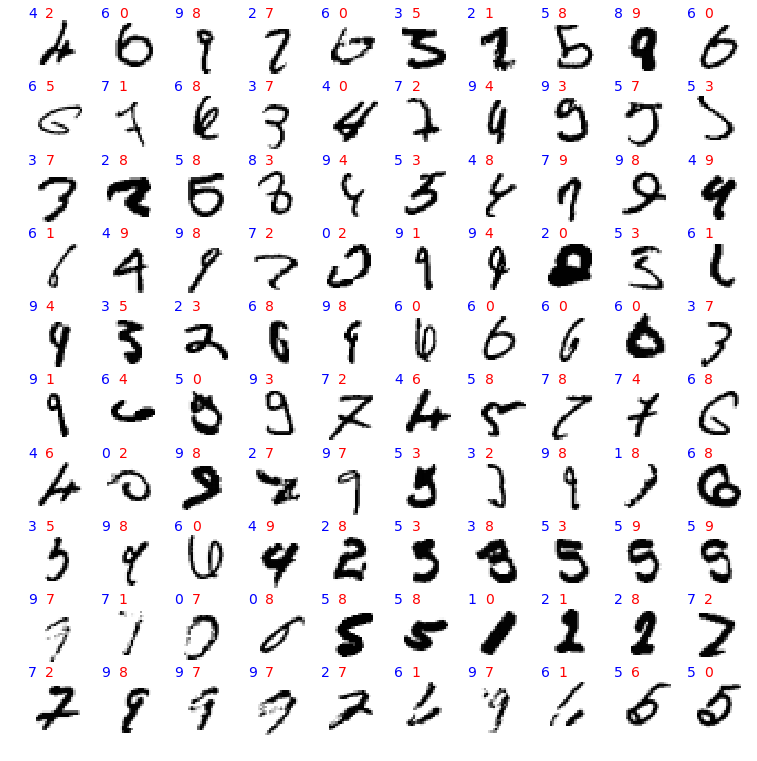

In [6]:
y_hat = model.predict_classes(X_test)
test_wrong = [im for im in zip(X_test,y_hat,y_test) if im[1] != im[2]]

plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28))
    plt.axis("off")
    plt.text(0, 0, val[2], fontsize=14, color='blue')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.imshow(im, cmap='gray')

In [7]:
# =============================
#  Distrorting inputs
# ============================
# Goal is to amplify the signal
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=25,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [8]:
# =============================
#  Training the model
# ============================
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=8, batch_size=128,
          verbose=2, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
 - 27s - loss: 0.0494 - acc: 0.9846 - val_loss: 0.0247 - val_acc: 0.9923
Epoch 2/8
 - 23s - loss: 0.0423 - acc: 0.9868 - val_loss: 0.0233 - val_acc: 0.9925
Epoch 3/8
 - 24s - loss: 0.0409 - acc: 0.9871 - val_loss: 0.0220 - val_acc: 0.9934
Epoch 4/8


KeyboardInterrupt: 

In [46]:
print("Test classification rate %0.05f" % model.evaluate(X_test, Y_test)[1])

 8768/10000 [=========================>....] - ETA: 0sTest classification rate 0.99190


In [4]:

# =============================
# Pre-packaged Models
# ============================
# For more detail see here : https://keras.io/applications/
# from keras.applications import ResNet50
# from keras.applications import InceptionV3
# from keras.applications.inception_v3 import preprocess_input
# from keras.applications import VGG19
# from keras.applications import Xception # TensorFlow ONLY

# =============================
#  Loading libraries
# ============================
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

img_path = './Pictures/tiger.jpg'

img = image.load_img(img_path, target_size=(224, 224))
model = VGG16(weights="imagenet", include_top=True)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
# Predicted value
print('Predicted:', decode_predictions(preds, top=3)[0])



('Predicted:', [(u'n02129604', u'tiger', 0.8049112), (u'n02123159', u'tiger_cat', 0.1949145), (u'n02128385', u'leopard', 6.4207627e-05)])
